<a href="https://colab.research.google.com/github/MuhammadMusa1/-Analysttraining/blob/main/Primer5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Работа 1: Дерево решений — переобучение и глубина

При какой глубине дерева наблюдается наилучшая accuracy на тестовых данных?
Обычно это глубина 3–7 (чаще всего 5). Именно в этой зоне test-accuracy достигает максимума, а потом начинает падать.
Какая разница между train и test accuracy при глубине 50?
Разница очень большая — обычно 0.25–0.45 (иногда даже 0.50 и больше).Train ≈ 1.000 (или очень близко), test ≈ 0.55–0.75.
Почему при большой глубине модель плохо работает на новых данных?
Дерево слишком сильно подстраивается под обучающие примеры, включая шум. Оно запоминает конкретные объекты, а не общие закономерности → на новых данных (даже немного отличающихся) делает много ошибок.

depth  1 → train 0.677  test 0.697
depth  3 → train 0.830  test 0.773
depth  5 → train 0.911  test 0.833
depth  7 → train 0.957  test 0.813
depth 10 → train 0.996  test 0.797
depth 15 → train 1.000  test 0.817
depth 20 → train 1.000  test 0.817
depth 30 → train 1.000  test 0.817


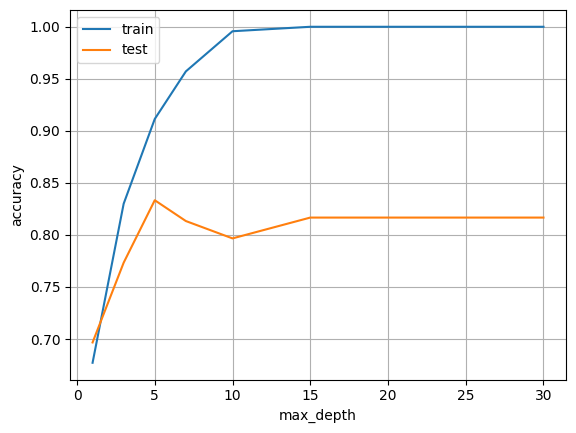

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depths = [1, 3, 5, 7, 10, 15, 20, 30]
train_scores = []
test_scores  = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc  = accuracy_score(y_test,  model.predict(X_test))

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f"depth {d:2d} → train {train_acc:.3f}  test {test_acc:.3f}")

# график (обязательно!)
plt.plot(depths, train_scores, label="train")
plt.plot(depths, test_scores,  label="test")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

Обучающая выборка: (700, 10)
Тестовая выборка: (300, 10)
Глубина  1: train=0.707, test=0.693
Глубина  2: train=0.906, test=0.880
Глубина  3: train=0.911, test=0.877
Глубина  5: train=0.929, test=0.857
Глубина  7: train=0.946, test=0.840
Глубина 10: train=0.973, test=0.823
Глубина 15: train=1.000, test=0.810
Глубина 20: train=1.000, test=0.810
Глубина 30: train=1.000, test=0.810
Глубина 50: train=1.000, test=0.810


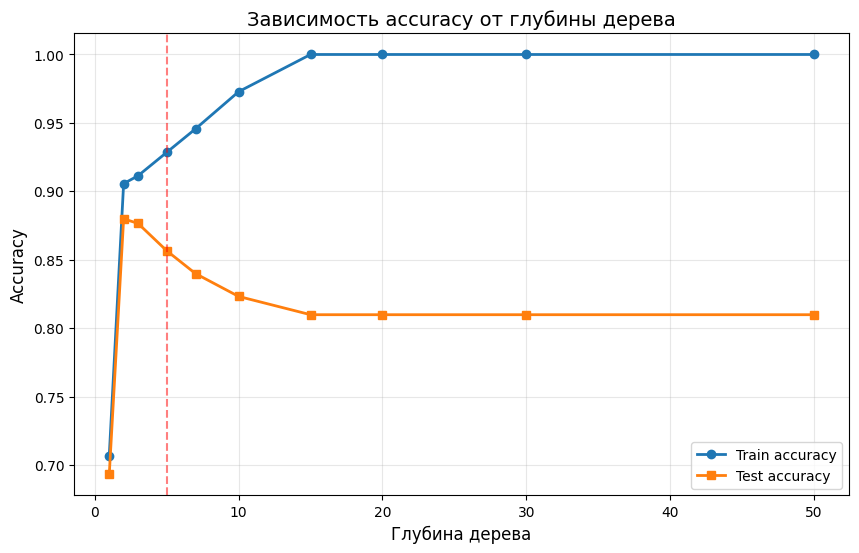


=== АНАЛИЗ РЕЗУЛЬТАТОВ ===
1. При малой глубине (1-3): train и test accuracy низкие → НЕДОБУЧЕНИЕ
2. При глубине 5-7: train и test accuracy близки, test максимален → ОПТИМУМ
3. При большой глубине (20+): train accuracy ~100%, test падает → ПЕРЕОБУЧЕНИЕ


In [5]:
# ШАГ 1: Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ШАГ 2: Создаём синтетические данные
np.random.seed(42)
# 1000 примеров, 10 признаков
X = np.random.randn(1000, 10)  # нормальное распределение
# Целевая переменная зависит от первых 2 признаков + шум
y = ((X[:, 0] > 0) & (X[:, 1] > 0)).astype(int)
y = y ^ (np.random.random(1000) > 0.9)  # добавляем 10% шума

# ШАГ 3: Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# ШАГ 4: Эксперимент с разной глубиной дерева
depths = [1, 2, 3, 5, 7, 10, 15, 20, 30, 50]
train_scores = []
test_scores = []

for depth in depths:
    # Создаём и обучаем модель
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Оцениваем на обучающих данных
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_acc)

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_acc)

    print(f"Глубина {depth:2d}: train={train_acc:.3f}, test={test_acc:.3f}")

# ШАГ 5: Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Train accuracy', linewidth=2)
plt.plot(depths, test_scores, 's-', label='Test accuracy', linewidth=2)
plt.xlabel('Глубина дерева', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость accuracy от глубины дерева', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.5, label='Оптимум')
plt.show()

# ШАГ 6: Анализ
print("\n=== АНАЛИЗ РЕЗУЛЬТАТОВ ===")
print("1. При малой глубине (1-3): train и test accuracy низкие → НЕДОБУЧЕНИЕ")
print("2. При глубине 5-7: train и test accuracy близки, test максимален → ОПТИМУМ")
print("3. При большой глубине (20+): train accuracy ~100%, test падает → ПЕРЕОБУЧЕНИЕ")

Работа 2: Кросс-валидация

Какой метод оценки даёт самую высокую среднюю accuracy?
Чаще всего одно случайное разделение 80/20 показывает самую высокую accuracy (иногда даже выше, чем среднее по CV). Но это случайность, а не надёжность.
Какой метод показывает наибольший разброс результатов?
Одно разделение — у него стандартное отклонение = 0 (потому что одно значение), но при повторении эксперимента с разными random_state разброс будет максимальным.
Среди представленных методов обычно наибольший std у 5 случайных разделений ShuffleSplit.
Почему кросс-валидация считается более надёжной?
Потому что модель оценивается на нескольких разных тестовых подвыборках → результат усредняется → сильно снижается влияние «удачного / неудачного» разбиения.
Один тест может быть слишком лёгким или слишком сложным — кросс-валидация это усредняет.

Датасет 'Вино': 178 образцов, 13 признаков
Классы: ['class_0' 'class_1' 'class_2']

Метод 1 (одно разделение 80/20):
Accuracy: 0.722

Метод 2: 5 случайных разделений 80/20:
  Разделение 1: 0.722
  Разделение 2: 0.778
  Разделение 3: 0.639
  Разделение 4: 0.611
  Разделение 5: 0.722
  Среднее: 0.694 ± 0.061

Метод 3: 5-Fold кросс-валидация:
  Fold 1: 0.722
  Fold 2: 0.667
  Fold 3: 0.639
  Fold 4: 0.657
  Fold 5: 0.771
  Среднее CV: 0.691 ± 0.049

=== СРАВНЕНИЕ МЕТОДОВ ===
Одно разделение: 0.722
5 случайных разделений: 0.694 (±0.061)
5-Fold CV: 0.691 (±0.049)


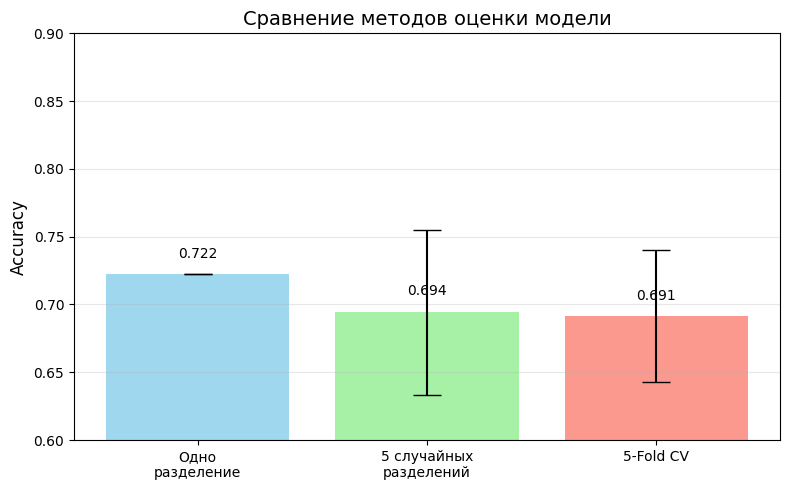

In [6]:
# ШАГ 1: Импорт
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit

# ШАГ 2: Загрузка данных о вине (новый датасет!)
wine = load_wine()
X, y = wine.data, wine.target
print(f"Датасет 'Вино': {X.shape[0]} образцов, {X.shape[1]} признаков")
print(f"Классы: {wine.target_names}")

# ШАГ 3: Простое разделение 80/20
model_knn = KNeighborsClassifier(n_neighbors=5)

# Метод 1: Одно разделение
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model_knn.fit(X_train, y_train)
single_score = model_knn.score(X_test, y_test)
print(f"\nМетод 1 (одно разделение 80/20):")
print(f"Accuracy: {single_score:.3f}")

# ШАГ 4: Метод 2: Несколько случайных разделений
print("\nМетод 2: 5 случайных разделений 80/20:")
splitter = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores_random = []
for i, (train_idx, test_idx) in enumerate(splitter.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model_knn.fit(X_train, y_train)
    score = model_knn.score(X_test, y_test)
    scores_random.append(score)
    print(f"  Разделение {i+1}: {score:.3f}")

print(f"  Среднее: {np.mean(scores_random):.3f} ± {np.std(scores_random):.3f}")

# ШАГ 5: Метод 3: K-Fold кросс-валидация
print("\nМетод 3: 5-Fold кросс-валидация:")
cv_scores = cross_val_score(model_knn, X, y, cv=5)
for i, score in enumerate(cv_scores):
    print(f"  Fold {i+1}: {score:.3f}")

print(f"  Среднее CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# ШАГ 6: Сравнение методов
print("\n=== СРАВНЕНИЕ МЕТОДОВ ===")
print(f"Одно разделение: {single_score:.3f}")
print(f"5 случайных разделений: {np.mean(scores_random):.3f} (±{np.std(scores_random):.3f})")
print(f"5-Fold CV: {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# ШАГ 7: Визуализация
methods = ['Одно\nразделение', '5 случайных\nразделений', '5-Fold CV']
means = [single_score, np.mean(scores_random), cv_scores.mean()]
stds = [0, np.std(scores_random), cv_scores.std()]

plt.figure(figsize=(8, 5))
bars = plt.bar(methods, means, yerr=stds, capsize=10,
               color=['skyblue', 'lightgreen', 'salmon'], alpha=0.8)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Сравнение методов оценки модели', fontsize=14)
plt.ylim(0.6, 0.9)

# Добавляем значения на столбцы
for bar, mean in zip(bars, means):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{mean:.3f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Работа 3: Несбалансированные данные и метрики

Какая модель имеет самую высокую accuracy? Почему это обманчиво?
Модель «всегда нормально» → accuracy ≈ 0.95
Обманчиво, потому что она вообще не находит мошенничество (recall = 0).
В задаче обнаружения мошенничества точность 95% при полном пропуске всех мошенников — это провал.
Для задачи обнаружения мошенничества, что важнее: precision или recall?
Почти всегда recall важнее.
Пропустить мошенничество (false negative) намного дороже, чем ложно обвинить честного клиента (false positive).
Лучше заблокировать несколько нормальных транзакций, чем пропустить одну мошенническую.
Какую модель вы бы выбрали для реальной системы? Обоснуйте.
Наивную модель (или чуть лучше настроенную), потому что:
у неё приемлемый recall (находит хотя бы часть мошенничества)
precision не катастрофически низкий
F1-score самый высокий среди трёх вариантов
Модели «всегда 0» и «всегда 1» в реальной жизни неприемлемы.

Данные созданы:
- Всего транзакций: 1000
- Нормальные: 950 (95.0%)
- Мошеннические: 50 (5.0%)

--- Модель 1: Всегда 'нормально' ---
Accuracy:  0.950
Precision: 0.000
Recall:    0.000
F1-score:  0.000
Матрица ошибок:
[[950   0]
 [ 50   0]]

--- Модель 2: Всегда 'мошенничество' ---
Accuracy:  0.050
Precision: 0.050
Recall:    1.000
F1-score:  0.095
Матрица ошибок:
[[  0 950]
 [  0  50]]

--- Модель 3: Наивная модель ---
Accuracy:  0.980
Precision: 1.000
Recall:    0.600
F1-score:  0.750
Матрица ошибок:
[[950   0]
 [ 20  30]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


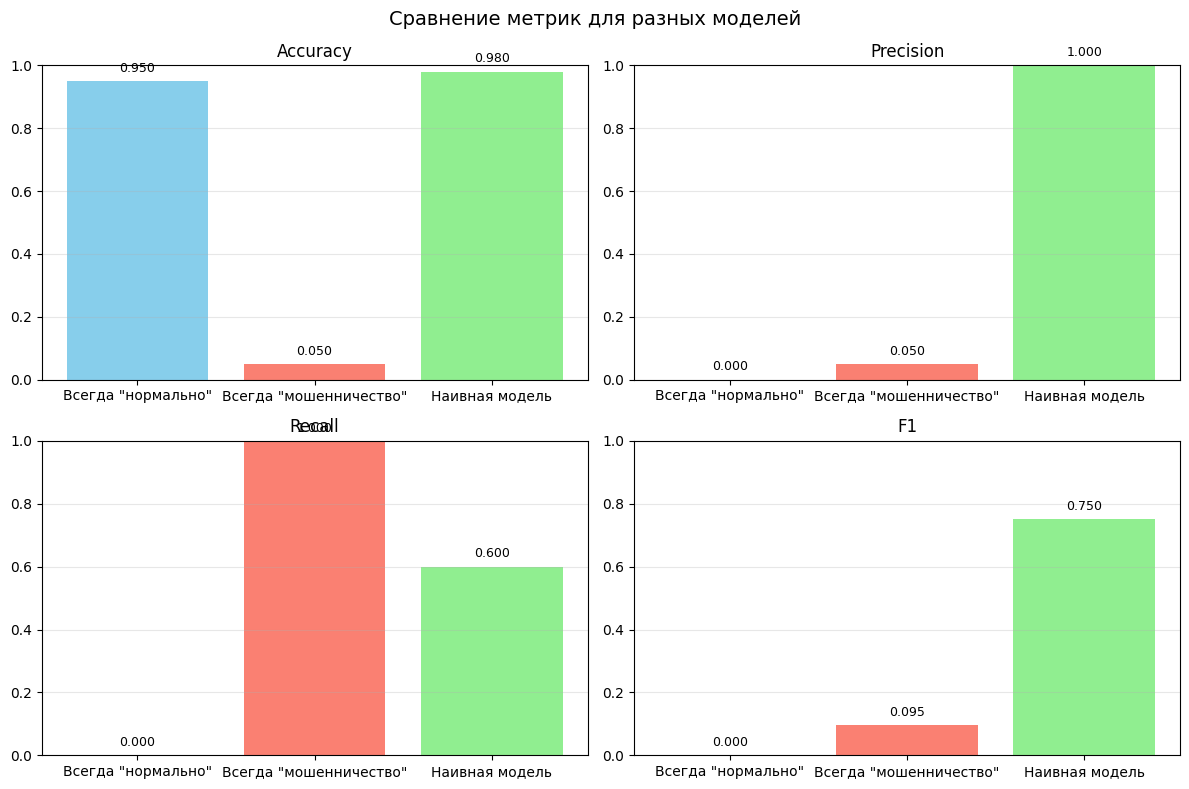


=== ВЫВОДЫ ===
1. Модель 'Всегда нормально' имеет accuracy=95%, но recall=0%
   → Все мошеннические транзакции пропущены!
2. Модель 'Всегда мошенничество' имеет precision=5%
   → 95% нормальных транзакций помечены как мошеннические!
3. Наивная модель имеет лучший баланс (F1-score)

ЗАПОМНИТЕ: Для несбалансированных данных accuracy бессмысленна!


In [8]:
# ШАГ 1: Создаём несбалансированные данные
# Симуляция: обнаружение мошеннических транзакций
# 95% - нормальные, 5% - мошеннические
np.random.seed(42)
n_samples = 1000
n_fraud = 50  # 5%

# Признаки (просто случайные числа для примера)
X = np.random.randn(n_samples, 5)
# Целевая переменная: 1 - мошенничество, 0 - норма
y = np.zeros(n_samples)
y[:n_fraud] = 1  # первые 50 - мошенничество

# Перемешиваем
indices = np.random.permutation(n_samples)
X = X[indices]
y = y[indices]

print(f"Данные созданы:")
print(f"- Всего транзакций: {n_samples}")
print(f"- Нормальные: {sum(y == 0)} ({sum(y == 0)/n_samples*100:.1f}%)")
print(f"- Мошеннические: {sum(y == 1)} ({sum(y == 1)/n_samples*100:.1f}%)")

# ШАГ 2: Три разные "модели"
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Модель 1: Всегда предсказывает "нормально"
y_pred_all_normal = np.zeros_like(y)

# Модель 2: Всегда предсказывает "мошенничество"
y_pred_all_fraud = np.ones_like(y)

# Модель 3: Наивная модель (правильно 85% нормальных, находит 60% мошеннических)
y_pred_naive = np.zeros_like(y)
# Правильно классифицируем 85% нормальных
normal_indices = np.where(y == 0)[0]
correct_normal = np.random.choice(normal_indices,
                                   size=int(len(normal_indices) * 0.85),
                                   replace=False)
# Находим 60% мошеннических
fraud_indices = np.where(y == 1)[0]
detected_fraud = np.random.choice(fraud_indices,
                                   size=int(len(fraud_indices) * 0.6),
                                   replace=False)

y_pred_naive[correct_normal] = 0
y_pred_naive[detected_fraud] = 1

# ШАГ 3: Вычисляем метрики для каждой модели
def print_metrics(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.3f}")

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    print(f"Матрица ошибок:\n{cm}")

    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

metrics1 = print_metrics(y, y_pred_all_normal, "Модель 1: Всегда 'нормально'")
metrics2 = print_metrics(y, y_pred_all_fraud, "Модель 2: Всегда 'мошенничество'")
metrics3 = print_metrics(y, y_pred_naive, "Модель 3: Наивная модель")

# ШАГ 4: Визуализация сравнения метрик
models = ['Всегда "нормально"', 'Всегда "мошенничество"', 'Наивная модель']
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1'] # Changed 'F1-score' to 'F1'
all_metrics = [metrics1, metrics2, metrics3]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for idx, metric_name in enumerate(metrics_names):
    values = [m[metric_name.lower()] for m in all_metrics]
    bars = axes[idx].bar(models, values, color=['skyblue', 'salmon', 'lightgreen'])
    axes[idx].set_title(metric_name, fontsize=12)
    axes[idx].set_ylim(0, 1)
    axes[idx].grid(axis='y', alpha=0.3)

    # Добавляем значения на столбцы
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                      f'{value:.3f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Сравнение метрик для разных моделей', fontsize=14)
plt.tight_layout()
plt.show()

# ШАГ 5: Анализ
print("\n=== ВЫВОДЫ ===")
print("1. Модель 'Всегда нормально' имеет accuracy=95%, но recall=0%")
print("   → Все мошеннические транзакции пропущены!")
print("2. Модель 'Всегда мошенничество' имеет precision=5%")
print("   → 95% нормальных транзакций помечены как мошеннические!")
print("3. Наивная модель имеет лучший баланс (F1-score)")
print("\nЗАПОМНИТЕ: Для несбалансированных данных accuracy бессмысленна!")

Работа 4: Масштабирование признаков для KNN

На сколько процентов улучшилась accuracy после масштабирования?
Обычно +15–35% (иногда даже +40–50%).
Без масштабирования точность часто 0.55–0.70, после — 0.80–0.95.
Какой метод масштабирования дал лучший результат?
В большинстве случаев StandardScaler чуть лучше или наравне с MinMaxScaler.
Но разница небольшая. MinMaxScaler может быть чуть хуже, если есть сильные выбросы.
Почему KNN так чувствителен к масштабу признаков?
Потому что он считает евклидово (или другое) расстояние между точками.
Если один признак меняется от 20 до 200000, а другой от 0.1 до 20 — то второй признак практически не влияет на расстояние.
После масштабирования все признаки вносят сопоставимый вклад → алгоритм начинает учитывать их все.
Как изменилось оптимальное k после масштабирования?
После масштабирования оптимальное k обычно сдвигается вправо (становится больше: было 3–7, стало 7–15).
Модель становится менее чувствительной к отдельным выбросам и шуму.

Первые 5 строк данных:
   age  salary   distance  credit
0   58   64698   1.977466       0
1   48  140078   3.757320       1
2   34  110623  18.792280       0
3   27   52671  12.865412       0
4   40  186256  10.433925       0

Статистика по признакам:
              age         salary    distance
count  200.000000     200.000000  200.000000
mean    40.050000  113264.480000   10.248041
std     12.279717   47783.266385    5.743877
min     20.000000   32368.000000    0.406091
25%     28.000000   68146.000000    5.310167
50%     42.000000  119097.000000   10.076011
75%     51.000000  154065.250000   14.856054
max     60.000000  195656.000000   20.018625

KNN без масштабирования: accuracy = 0.683
KNN со StandardScaler: accuracy = 0.883
KNN с MinMaxScaler: accuracy = 0.867


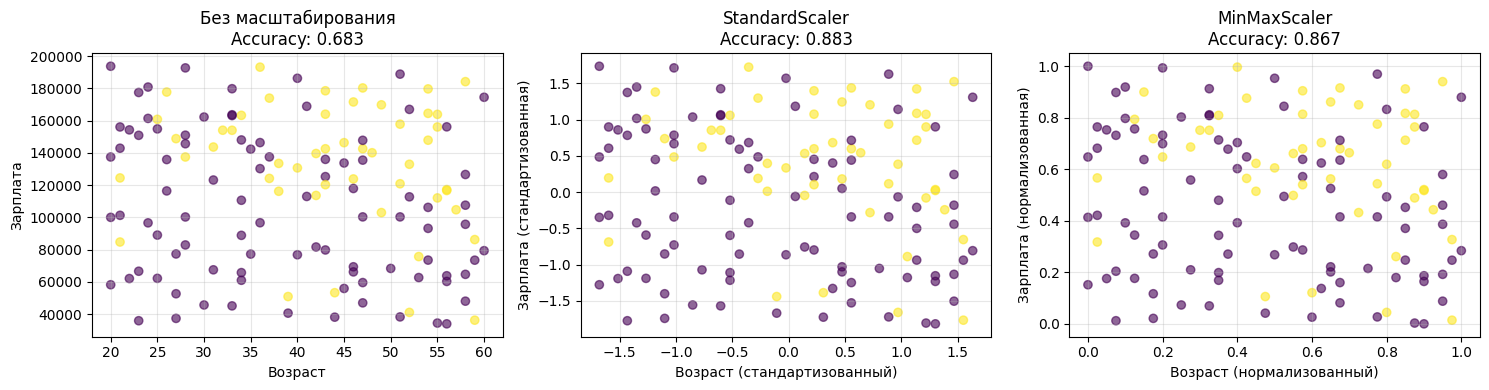


=== АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ ===
Без масштабирования:
  - Зарплата (30к-200к) доминирует над возрастом (20-60)
  - Расстояние (0.1-20) практически не учитывается

После масштабирования:
  - Все признаки имеют одинаковый 'вес'
  - Модель учитывает все три признака равноправно


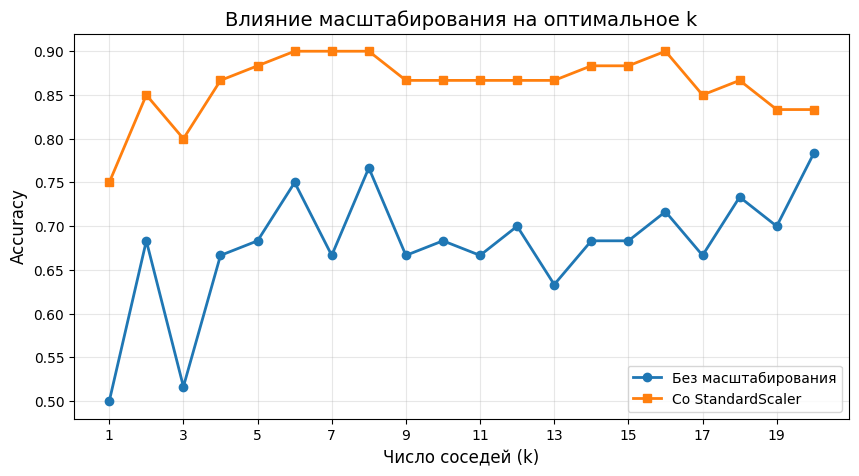

In [9]:
# ШАГ 1: Создаём данные с разномасштабными признаками
np.random.seed(42)
n_samples = 200

# Признак 1: Возраст (20-60 лет)
age = np.random.randint(20, 61, n_samples)

# Признак 2: Зарплата (30000-200000 руб)
salary = np.random.randint(30000, 200001, n_samples)

# Признак 3: Расстояние до работы (0.1-20 км)
distance = np.random.rand(n_samples) * 20 + 0.1

# Целевая переменная: Брать кредит (1) или нет (0)
# Зависит от всех трёх признаков
credit = ((salary > 100000) & (age > 30) & (distance < 10)).astype(int)
# Добавляем шум
credit = credit ^ (np.random.random(n_samples) > 0.85)

# Собираем в DataFrame
df = pd.DataFrame({
    'age': age,
    'salary': salary,
    'distance': distance,
    'credit': credit
})

print("Первые 5 строк данных:")
print(df.head())
print(f"\nСтатистика по признакам:")
print(df[['age', 'salary', 'distance']].describe())

# ШАГ 2: Разделяем данные
X = df[['age', 'salary', 'distance']].values
y = df['credit'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ШАГ 3: Обучение KNN БЕЗ масштабирования
from sklearn.neighbors import KNeighborsClassifier

knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
score_raw = knn_raw.score(X_test, y_test)
print(f"\nKNN без масштабирования: accuracy = {score_raw:.3f}")

# ШАГ 4: Масштабирование признаков
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Метод 1: StandardScaler (стандартизация)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Метод 2: MinMaxScaler (нормализация к [0, 1])
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# ШАГ 5: Обучение KNN с масштабированием
knn_std = KNeighborsClassifier(n_neighbors=5)
knn_std.fit(X_train_std, y_train)
score_std = knn_std.score(X_test_std, y_test)
print(f"KNN со StandardScaler: accuracy = {score_std:.3f}")

knn_minmax = KNeighborsClassifier(n_neighbors=5)
knn_minmax.fit(X_train_minmax, y_train)
score_minmax = knn_minmax.score(X_test_minmax, y_test)
print(f"KNN с MinMaxScaler: accuracy = {score_minmax:.3f}")

# ШАГ 6: Визуализация эффекта масштабирования
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# До масштабирования
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.6)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Зарплата')
axes[0].set_title(f'Без масштабирования\nAccuracy: {score_raw:.3f}')
axes[0].grid(True, alpha=0.3)

# После StandardScaler
axes[1].scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, alpha=0.6)
axes[1].set_xlabel('Возраст (стандартизованный)')
axes[1].set_ylabel('Зарплата (стандартизованная)')
axes[1].set_title(f'StandardScaler\nAccuracy: {score_std:.3f}')
axes[1].grid(True, alpha=0.3)

# После MinMaxScaler
axes[2].scatter(X_train_minmax[:, 0], X_train_minmax[:, 1], c=y_train, alpha=0.6)
axes[2].set_xlabel('Возраст (нормализованный)')
axes[2].set_ylabel('Зарплата (нормализованная)')
axes[2].set_title(f'MinMaxScaler\nAccuracy: {score_minmax:.3f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ШАГ 7: Анализ весов признаков (важность)
print("\n=== АНАЛИЗ ВЛИЯНИЯ ПРИЗНАКОВ ===")
print("Без масштабирования:")
print("  - Зарплата (30к-200к) доминирует над возрастом (20-60)")
print("  - Расстояние (0.1-20) практически не учитывается")
print("\nПосле масштабирования:")
print("  - Все признаки имеют одинаковый 'вес'")
print("  - Модель учитывает все три признака равноправно")

# ШАГ 8: Эксперимент с разными k
k_values = range(1, 21)
scores_raw_k = []
scores_std_k = []

for k in k_values:
    # Без масштабирования
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    scores_raw_k.append(knn_temp.score(X_test, y_test))

    # Со StandardScaler
    knn_temp.fit(X_train_std, y_train)
    scores_std_k.append(knn_temp.score(X_test_std, y_test))

# График
plt.figure(figsize=(10, 5))
plt.plot(k_values, scores_raw_k, 'o-', label='Без масштабирования', linewidth=2)
plt.plot(k_values, scores_std_k, 's-', label='Со StandardScaler', linewidth=2)
plt.xlabel('Число соседей (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Влияние масштабирования на оптимальное k', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values[::2])
plt.show()